In [33]:
import os
import cv2
from torch.utils.data import Dataset
from einops import rearrange
import random
import torch
import matplotlib.pyplot as plt
import copy
import re

In [34]:
# custom comparator for file names
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

In [40]:
# directory handling
root = "/home/niksrid/mental-models/LAMP/bridge"
traj_folder_paths = sorted([os.path.join(root, traj_folder) for traj_folder in os.listdir(root)], key=alphanum_key)
num_prompts = len(traj_folder_paths)
print(traj_folder_paths)
print(num_prompts)

# assume idx of 0 for get item
idx = 0

['/home/niksrid/mental-models/LAMP/bridge/traj0', '/home/niksrid/mental-models/LAMP/bridge/traj1', '/home/niksrid/mental-models/LAMP/bridge/traj2', '/home/niksrid/mental-models/LAMP/bridge/traj3', '/home/niksrid/mental-models/LAMP/bridge/traj4', '/home/niksrid/mental-models/LAMP/bridge/traj5', '/home/niksrid/mental-models/LAMP/bridge/traj6', '/home/niksrid/mental-models/LAMP/bridge/traj7', '/home/niksrid/mental-models/LAMP/bridge/traj8', '/home/niksrid/mental-models/LAMP/bridge/traj9', '/home/niksrid/mental-models/LAMP/bridge/traj10', '/home/niksrid/mental-models/LAMP/bridge/traj11', '/home/niksrid/mental-models/LAMP/bridge/traj12', '/home/niksrid/mental-models/LAMP/bridge/traj13', '/home/niksrid/mental-models/LAMP/bridge/traj14', '/home/niksrid/mental-models/LAMP/bridge/traj15', '/home/niksrid/mental-models/LAMP/bridge/traj16', '/home/niksrid/mental-models/LAMP/bridge/traj17', '/home/niksrid/mental-models/LAMP/bridge/traj18', '/home/niksrid/mental-models/LAMP/bridge/traj19', '/home/ni

In [41]:
# lang label 
prompt = None
with open(os.path.join(traj_folder_paths[idx], "lang.txt"), 'r') as file:
    prompt = file.readline().strip()
print(prompt)

move the arch on top of the blocks


In [42]:
# traj directory handling (single view)
traj_length = 16
sample_frame_rate = 1
traj_folder_path = traj_folder_paths[idx]
cam0_folder_path = os.path.join(traj_folder_path, "images0")
img_paths = sorted([os.path.join(cam0_folder_path, file) for file in os.listdir(cam0_folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))], key=alphanum_key)
start_idx = random.randint(0, len(img_paths)-traj_length*sample_frame_rate-1)
sample_idx = list(range(start_idx, len(img_paths), sample_frame_rate))[:traj_length]
print(traj_folder_path)
print(cam0_folder_path)
print(img_paths)
print(start_idx)
print(sample_idx)

/home/niksrid/mental-models/LAMP/bridge/traj0
/home/niksrid/mental-models/LAMP/bridge/traj0/images0
['/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_0.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_1.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_2.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_3.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_4.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_5.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_6.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_7.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_8.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_9.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_10.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_11.jpg', '/home/niksrid/mental-models/LAMP/bridge/traj0/images0/im_12.jpg', '/home/niksrid/mental-models/LAMP/brid

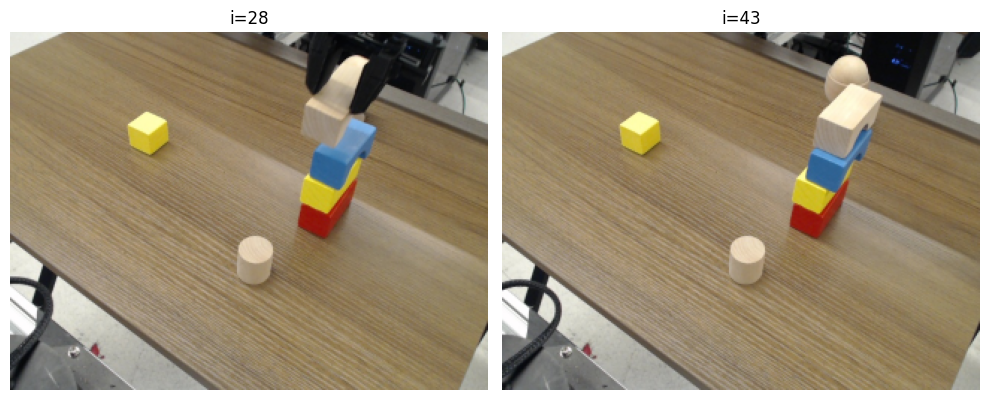

In [44]:
# traj imgs (single view)
height = 240
width = 320
channels = 3
img_t = torch.zeros((len(sample_idx), height, width, channels), dtype=torch.uint8)
for i, val in enumerate(sample_idx):
    img_path = copy.copy(img_paths[val])
    img = cv2.imread(img_path)
    img = cv2.resize(img, (width, height))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_t[i] = torch.from_numpy(img)
# img verification


In [46]:
# img manipulation 
img_t = img_t.permute(0, 3, 1, 2)
if random.uniform(0, 1) > 0.5:
    img_t = torch.flip(img_t, dims=[3])
example = {
    "pixel_values": (img_t / 127.5 - 1.0),
    "prompt": prompt
}
print(example)

{'pixel_values': tensor([[[[-0.8118, -0.6863, -0.6549,  ...,  0.8196,  0.8196,  0.8039],
          [-0.8118, -0.6863, -0.6471,  ...,  0.8353,  0.8353,  0.8275],
          [-0.8118, -0.6706, -0.6157,  ...,  0.7961,  0.7961,  0.7725]],

         [[-0.7961, -0.7176, -0.6000,  ...,  0.8118,  0.8039,  0.7961],
          [-0.7882, -0.7098, -0.5765,  ...,  0.8275,  0.8196,  0.8196],
          [-0.7725, -0.6784, -0.5529,  ...,  0.7882,  0.7804,  0.7647]],

         [[-0.6157, -0.7412, -0.7255,  ...,  0.8118,  0.8118,  0.8039],
          [-0.5843, -0.7098, -0.7020,  ...,  0.8275,  0.8353,  0.8275],
          [-0.5765, -0.6863, -0.6627,  ...,  0.7882,  0.7804,  0.7569]],

         ...,

         [[ 0.2706,  0.2627,  0.2549,  ..., -0.4275, -0.4039, -0.3569],
          [ 0.2706,  0.2627,  0.2549,  ..., -0.5294, -0.4980, -0.4824],
          [ 0.1922,  0.1843,  0.1765,  ..., -0.6627, -0.6235, -0.6000]],

         [[ 0.2941,  0.3020,  0.2627,  ..., -0.4118, -0.4118, -0.3725],
          [ 0.2941,  0.3